<a href="https://colab.research.google.com/github/JuJu2181/yolo-mask-detection/blob/master/yolov3_mask_detection_final1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook has code to train the YOLO Mask detection System

# YOLOv3 Mask Detection System
~ By Anish Shilpakar

Check for GPU in Colab

In [1]:
# Enable GPU in google collab if not on this portion will flag error.
!nvidia-smi

Tue Aug  2 11:37:25 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/MyDrive/Mask-Detection

/content/gdrive/MyDrive/Mask-Detection


In [ ]:
!ls

### 1) Clone the Darknet
**This Porition is essentially responsible for cloning Darknet because Yolo was developed using Darknet framework and runs only on that particular framework**



In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15460, done.
remote: Total 15460 (delta 0), reused 0 (delta 0), pack-reused 15460
Receiving objects: 100% (15460/15460), 14.07 MiB | 9.01 MiB/s, done.
Resolving deltas: 100% (10385/10385), done.


### 2) Compile Darknet using Nvidia GPU
**This porition is responsible for Compiling Darknet using Nvidia GPU and making slight adjustments to make file**



In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!make

/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
           

### 3) Configure Darknet network for training YOLO V3

In [ ]:
!cp cfg/yolov3.cfg cfg/yolov3_training.cfg

In [ ]:
!sed -i 's/batch=1/batch=8/' cfg/yolov3_training.cfg
!sed -i 's/subdivisions=1/subdivisions=16/' cfg/yolov3_training.cfg
!sed -i 's/max_batches = 500200/max_batches = 4000/' cfg/yolov3_training.cfg
!sed -i '610 s@classes=80@classes=2@' cfg/yolov3_training.cfg
!sed -i '696 s@classes=80@classes=2@' cfg/yolov3_training.cfg
!sed -i '783 s@classes=80@classes=2@' cfg/yolov3_training.cfg
!sed -i '603 s@filters=255@filters=21@' cfg/yolov3_training.cfg
!sed -i '689 s@filters=255@filters=21@' cfg/yolov3_training.cfg
!sed -i '776 s@filters=255@filters=21@' cfg/yolov3_training.cfg

In [ ]:
# Create folder on google drive so that we can save there the weights
!mkdir "/content/gdrive/MyDrive/Mask-Detection/yolov3_weights"

Creating obj.names and obj.data files   
obj.names can also be simply created by renaming classes.txt to obj.names

In [ ]:
!echo "no_mask" > data/obj.names
!echo "mask" > data/obj.names
!echo -e 'classes= 2\ntrain  = /content/gdrive/MyDrive/Mask-Detection/dataset/train.txt\nvalid  = /content/gdrive/MyDrive/Mask-Detection/dataset/valid.txt\nnames = data/obj.names\nbackup = /content/gdrive/MyDrive/Mask-Detection/yolov3_weights' > data/obj.data

Download pre trained weights for YOLOv3

In [ ]:
# Download weights darknet model 53
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2022-07-31 07:14:56--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  18.5MB/s    in 9.4s    

2022-07-31 07:15:07 (16.4 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



### 4) Extract Images

**The images need to be inside a zip archive called "images.zip" and they need to be inside the folder "yolov3" if any other name used .zip file and folder name is adjustment accordingly on Google Drive**

This is an optional step if you have already imported unzipped files in the google drive

In [ ]:
!unzip /content/gdrive/MyDrive/yolov3/Data.zip -d data/obj

The following code is only suitable for single class to convert class index of the labels not required in this case

In [ ]:
#This part is entirely optional
# We're going to convert the class index on the .txt files. As we're working with only one class, it's supposed to be class 0.
# If the index is different from 0 then we're going to change it.
import glob
import os
import re

txt_file_paths = glob.glob(r"data/obj/*.txt")
for i, file_path in enumerate(txt_file_paths):
    # get image size
    with open(file_path, "r") as f_o:
        lines = f_o.readlines()

        text_converted = []
        for line in lines:
            print(line)
            numbers = re.findall("[0-9.]+", line)
            print(numbers)
            if numbers:

                # Define coordinates
                text = "{} {} {} {} {}".format(0, numbers[1], numbers[2], numbers[3], numbers[4])
                text_converted.append(text)
                print(i, file_path)
                print(text)
        # Write file
        with open(file_path, 'w') as fp:
            for item in text_converted:
                fp.writelines("%s\n" % item)

0 0.490942 0.500000 0.373188 0.300546

['0', '0.490942', '0.500000', '0.373188', '0.300546']
0 data/obj/images - 2022-07-31T105630.437.txt
0 0.490942 0.500000 0.373188 0.300546
0 0.484444 0.495556 0.880000 0.733333

['0', '0.484444', '0.495556', '0.880000', '0.733333']
1 data/obj/images (98).txt
0 0.484444 0.495556 0.880000 0.733333
0 0.506154 0.510000 0.886154 0.693846

['0', '0.506154', '0.510000', '0.886154', '0.693846']
2 data/obj/PPE-100_1-650x650.txt
0 0.506154 0.510000 0.886154 0.693846
0 0.716364 0.644809 0.414545 0.480874

['0', '0.716364', '0.644809', '0.414545', '0.480874']
3 data/obj/images (18).txt
0 0.716364 0.644809 0.414545 0.480874
0 0.505455 0.540984 0.836364 0.852459

['0', '0.505455', '0.540984', '0.836364', '0.852459']
4 data/obj/images (28).txt
0 0.505455 0.540984 0.836364 0.852459
0 0.478764 0.435567 0.378378 0.335052

['0', '0.478764', '0.435567', '0.378378', '0.335052']
5 data/obj/images (58).txt
0 0.478764 0.435567 0.378378 0.335052
0 0.249091 0.598361 0.33090

In [ ]:
import glob
images_list = glob.glob("data/obj/*.jpg")
print(images_list)

['data/obj/download (5).jpg', 'data/obj/images (97).jpg', 'data/obj/images (96).jpg', 'data/obj/images (40).jpg', 'data/obj/images (39).jpg', 'data/obj/images - 2022-07-31T105630.142.jpg', 'data/obj/1920x1080 Banner 2.jpg', 'data/obj/images - 2022-07-31T105630.000.jpg', 'data/obj/images (49).jpg', 'data/obj/61nAkcenNTS._AC_SX425_.jpg', 'data/obj/images (41).jpg', 'data/obj/images - 2022-07-31T105631.021.jpg', 'data/obj/images (22).jpg', 'data/obj/download (9).jpg', 'data/obj/download (16).jpg', 'data/obj/gettyimages-1316868296crop.jpg', 'data/obj/images (63).jpg', 'data/obj/images (28).jpg', 'data/obj/surgical_mask_still_life-1296x728-header2.jpg', 'data/obj/images (86).jpg', 'data/obj/download (10).jpg', 'data/obj/maxresdefault.jpg', 'data/obj/images (13).jpg', 'data/obj/images - 2022-07-31T105630.963.jpg', 'data/obj/download (7).jpg', 'data/obj/medical_mask.width-320.jpg', 'data/obj/images (58).jpg', 'data/obj/images (91).jpg', 'data/obj/MasksSaveLives.jpg', 'data/obj/images (73).jpg

In [ ]:
#Create training.txt file
file = open("data/train.txt", "w") 
file.write("\n".join(images_list)) 
file.close() 

## Parameters

In [10]:
data_file = '/content/gdrive/MyDrive/Mask-Detection/darknet/data/obj.data'
cfg_file = '/content/gdrive/MyDrive/Mask-Detection/darknet/cfg/yolov3_training.cfg'
# for initial
weights = '/content/gdrive/MyDrive/Mask-Detection/darknet/darknet53.conv.74'
# for retraining with final weights to more iterations
weights = '/content/gdrive/MyDrive/Mask-Detection/yolov3_weights/yolov3_training_final.weights'

## To solve darknet Permission denied error

In [7]:
%cd ..

/content/gdrive/MyDrive/Mask-Detection


In [8]:
!chmod +x darknet/darknet

### 6) Start the training

In [ ]:
%cd /content/gdrive/MyDrive/Mask-Detection/darknet
# Start the training
!./darknet detector train {data_file} {cfg_file} {weights} -dont_show -map

Streaming output truncated to the last 5000 lines.
 total_bbox = 147486, rewritten_bbox = 0.058989 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.801178), count: 2, class_loss = 0.807563, iou_loss = 0.187519, total_loss = 0.995082 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.595990), count: 2, class_loss = 1.657070, iou_loss = 1.004673, total_loss = 2.661744 
 total_bbox = 147490, rewritten_bbox = 0.058987 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.795910), count: 2, class_loss = 0.083048, iou_loss = 0.211133, total_loss = 0.294181 
v3 (ms

To test in an image

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
def show_predicted_image():
    predicted_image = cv2.imread('predictions.jpg',cv2.IMREAD_UNCHANGED)
    cv2_imshow(predicted_image)

In [11]:
# Best weights 
weights = '/content/gdrive/MyDrive/Mask-Detection/yolov3_weights/yolov3_training_best.weights'

Enter Image to detect Mask: /content/gdrive/MyDrive/Mask-Detection/dataset/images/test/te10.jpg
/content/gdrive/MyDrive/Mask-Detection/darknet
 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 

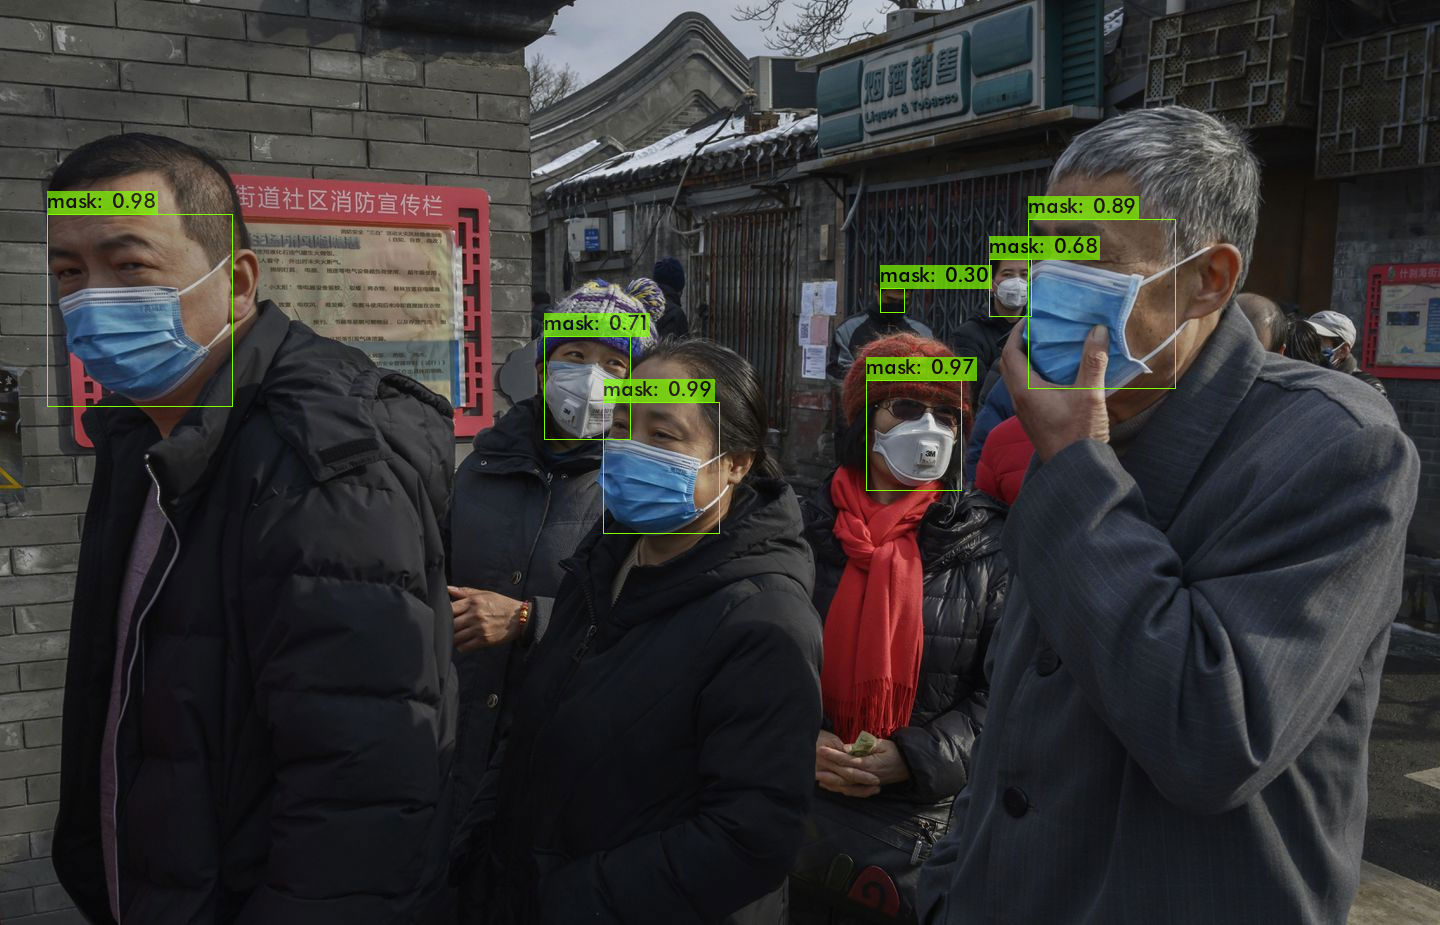

In [ ]:
img_path = input('Enter Image to detect Mask: ')
%cd /content/gdrive/MyDrive/Mask-Detection/darknet
!./darknet detector test {data_file} {cfg_file} {weights} {img_path} 
show_predicted_image()

MaP calculation

In [ ]:
%cd /content/gdrive/MyDrive/Mask-Detection/darknet
!./darknet detector map {data_file} {cfg_file} {weights}

/content/gdrive/MyDrive/Mask-Detection/darknet
 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  10

Testing in video

In [14]:
video_path = input('Enter video to detect Mask: ')
%cd /content/gdrive/MyDrive/Mask-Detection/darknet
!./darknet detector demo {data_file} {cfg_file} {weights} -dont_show {video_path} -i 0 -out_filename results.mp4

Enter video to detect Mask: /content/gdrive/MyDrive/Mask-Detection/test_vid.mp4
/content/gdrive/MyDrive/Mask-Detection/darknet
 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
Demo
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 -